## Low voltage network

<img src="./svg/bench_1.svg", width=800>

In [6]:
import numpy as np
inv = np.linalg.inv
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
output_notebook()

alpha = np.exp(1j*2.0/3.0*np.pi)

def vec3(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    return amp*vec*np.exp(-1j*np.deg2rad(deg_ang))
    
def vec4(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    abc = amp*vec*np.exp(-1j*np.deg2rad(deg_ang))   
    n = -np.sum(abc)
    return np.vstack((abc,n))
    
    

def diag_2d_inv(Z_lines):
    
    N_cols = 0
    for item in Z_lines:
        N_cols += item.shape[0]
    
    Y = np.zeros((N_cols,N_cols))+0j
    it = 0
    for item in Z_lines:
        diag = np.zeros((len(Z_lines),))
        diag[it] = 1
        I = np.diag(diag)
        Y += np.kron(I,np.linalg.inv(item))
        it += 1
        
    return Y

def diag_2d(Z_lines):
    
    N_cols = 0
    for item in Z_lines:
        N_cols += item.shape[0]
    
    Z = np.zeros((N_cols,N_cols))+0j
    it = 0
    for item in Z_lines:
        diag = np.zeros((len(Z_lines),))
        diag[it] = 1
        I = np.diag(diag)
        Z += np.kron(I,item)
        it += 1
        
    return Z



Loading BokehJS ...

$$ \sf \mathbf{Y} = \mathbf{A} \mathbf{Y}_{lines} \mathbf{A}^{T} $$

In [7]:
Eye = np.eye(4)

A_bus = np.array([
    [ 1, 0, 0, 0],
    [-1, 1, 0, 0],
    [ 0,-1, 1, 1],
    [ 0, 0,-1, 0],
    [ 0, 0, 0,-1]   
])

A = np.kron(A_bus,Eye)


Z_line_1 = np.array([[0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j],
                     [0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j],
                     [0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j],
                     [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j]])



        
    
Y_lines = diag_2d_inv([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1])

Y = A @ Y_lines @ A.T

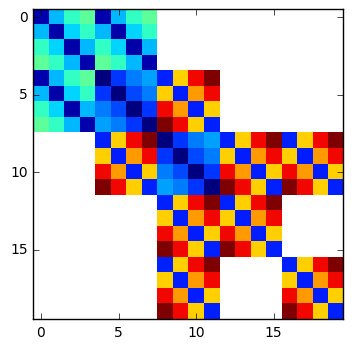

In [8]:

f = plt.figure()
ax = f.add_subplot(111)
ax.imshow(np.abs(Y**-1), interpolation='nearest')
f.canvas.draw()

$$ 
\sf \mathbf{i} =  \mathbf{Y} \mathbf{v} 
$$



$$ 
\sf
\mathbf{Y} =
\left[
\begin{array}{r|r}
\sf \mathbf{Y}_{slack} &  \sf\mathbf{Y}_{sr} \\
\hline
\sf\mathbf{Y}_{rs} & \sf\mathbf{Y}_r
\end{array} 
\right]
$$

$$ 
\sf
\mathbf{v} =
\left[
\begin{array}{r}
\sf \mathbf{v}_{src} \\
\hline
\sf \mathbf{v}_{uk} 
\end{array} 
\right]
$$

$$ 
\sf
\mathbf{i} =
\left[
\begin{array}{r}
\sf \mathbf{i}_{uk} \\
\hline
\sf \mathbf{i}_{src} 
\end{array} 
\right]
$$

$$
\left[
\begin{array}{r}
\sf \mathbf{i}_{uk} \\
\hline
\sf \mathbf{i}_{src} 
\end{array} 
\right]
=
\left[
\begin{array}{r|r}
\sf \mathbf{Y}_{slack} &  \sf\mathbf{Y}_{sr} \\
\hline
\sf \mathbf{Y}_{rs} & \sf\mathbf{Y}_r
\end{array} 
\right]
\left[
\begin{array}{r}
\sf \mathbf{v}_{src} \\
\hline
\sf \mathbf{v}_{uk} 
\end{array} 
\right]
$$


$$ 
\sf \mathbf{v}_{uk} =  \mathbf{Y}_r^{-1} \left(\mathbf{i}_{src} - \mathbf{Y}_{rs} \mathbf{v}_{src} \right)
$$

$$ 
\sf \mathbf{i}_{uk} =  \mathbf{Y}_{slack} \mathbf{v}_{src} + \mathbf{Y}_{sr} \mathbf{v}_{uk} 
$$


In [9]:
V_src_1 = np.array(vec4(231,0))
I_src_2 = np.array(vec4(0,0))
I_src_3 = np.array(vec4(0,0))
I_src_4 = np.array([2,-1,-1,0]).reshape(4,1)
I_src_5 = np.array(vec4(10.0,0))

V_src = np.vstack((V_src_1))
I_src = np.vstack((I_src_2,I_src_3,I_src_4,I_src_5))

Y_slack = Y[0:4,0:4]
Y_sr = Y[0:4,4:]
Y_rs = Y[4:,0:4]
Y_r = Y[4:,4:]


V_uk =inv(Y_r)@(I_src -Y_rs @ V_src)
I_uk =Y_slack @ V_src + Y_sr @ V_uk

print(np.abs(V_uk))
print(np.abs(I_uk))

[[ 233.76643758]
 [ 233.46573506]
 [ 233.92282725]
 [   0.34043171]
 [ 239.33772763]
 [ 238.43071669]
 [ 239.79081249]
 [   1.02129513]
 [ 240.33311002]
 [ 238.45290033]
 [ 240.34226555]
 [   1.10205206]
 [ 243.9554797 ]
 [ 243.40989839]
 [ 245.13833975]
 [   1.62345888]]
[[  1.20000000e+01]
 [  1.05356538e+01]
 [  1.05356538e+01]
 [  1.91220503e-13]]


## Extended network

<img src="./svg/bench_1_extended.svg", width=800>

In [10]:
A_bus = np.array([
    [ 1, 0, 0, 0, 0, 0, 0],
    [-1, 1, 0, 0,-1, 0, 0],
    [ 0,-1, 1, 1, 0, 0, 0],
    [ 0, 0,-1, 0, 0,-1, 0],
    [ 0, 0, 0,-1, 0, 0,-1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 0, 1, 0],   
    [ 0, 0, 0, 0, 0, 0, 1]   
])

A = np.kron(A_bus,Eye)

Z_vsc = np.diag([0.01+0.1j, 0.01+0.1j, 0.01+0.1j, 0.01+0.1j])


Y_lines = diag_2d_inv([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1,Z_vsc,Z_vsc,Z_vsc])

Y = A @ Y_lines @ A.T

In [11]:
V_src_6 = V_uk[0:4] + np.matmul(Z_vsc,I_src_2)
V_src_7 = V_uk[8:12] + np.matmul(Z_vsc,I_src_3)
V_src_8 = V_uk[12:16] + np.matmul(Z_vsc,I_src_4)

Problem: Y must be resorted beacuase nodes 6,7,8 are at the end

In [12]:
sorter = np.array([1,6,7,8,2,3,4,5])-1 # new order

I_perm_bus = np.zeros((8,8)) 

I_perm_bus[sorter,range(8)] = 1

I_perm = np.kron(I_perm_bus,Eye)

Y_sorted = np.matmul(np.matmul(I_perm,Y),I_perm)

In [13]:
V_src_1 = np.array(vec4(231,0))
I_src_2 = np.array(vec4(0,0))
I_src_3 = np.array(vec4(0,0))
I_src_4 = np.array(vec4(0,0))
I_src_5 = np.array(vec4(0,0))



V_src = np.vstack((V_src_1,V_src_6,V_src_7,V_src_8)) 
I_src = np.vstack((I_src_2,I_src_3,I_src_4,I_src_5))

n_known =  16
Y_slack = Y_sorted[0:n_known,0:n_known]
Y_sr = Y_sorted[0:n_known,n_known:]
Y_rs = Y_sorted[n_known:,0:n_known]
Y_r = Y_sorted[n_known:,n_known:]


V_uk =inv(Y_r)@(I_src -Y_rs @ V_src)
I_uk =Y_slack @ V_src + Y_sr @ V_uk

V_full = np.vstack((V_src, V_uk))
I_full = np.vstack((I_uk ,I_src))

print(np.abs(V_full))
print(np.abs(I_full))


[[  2.31000000e+02]
 [  2.31000000e+02]
 [  2.31000000e+02]
 [  7.10542736e-14]
 [  2.33766438e+02]
 [  2.33465735e+02]
 [  2.33922827e+02]
 [  3.40431711e-01]
 [  2.40333110e+02]
 [  2.38452900e+02]
 [  2.40342266e+02]
 [  1.10205206e+00]
 [  2.43982287e+02]
 [  2.43330185e+02]
 [  2.45231083e+02]
 [  1.62345888e+00]
 [  2.33765059e+02]
 [  2.33465287e+02]
 [  2.33922645e+02]
 [  3.40425471e-01]
 [  2.39330198e+02]
 [  2.38425058e+02]
 [  2.39792599e+02]
 [  1.02096276e+00]
 [  2.40287137e+02]
 [  2.38516612e+02]
 [  2.40255542e+02]
 [  1.10113055e+00]
 [  2.43982287e+02]
 [  2.43330185e+02]
 [  2.45231083e+02]
 [  1.62345888e+00]]
[[  1.19964677e+01]
 [  1.05329887e+01]
 [  1.05361445e+01]
 [  6.74585260e-04]
 [  1.02191659e+01]
 [  9.92714247e+00]
 [  1.01591147e+01]
 [  1.85223179e-02]
 [  1.40178438e-02]
 [  7.87718064e-03]
 [  6.67059257e-03]
 [  1.27922483e-03]
 [  1.79793974e+00]
 [  9.05812670e-01]
 [  8.98454925e-01]
 [  1.73510465e-02]
 [  0.00000000e+00]
 [  0.00000000e+00]

## Only voltages network 

$$ 
\sf \mathbf{v}_l =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i_l} 
$$

$$ 
\sf \mathbf{i_n} = 0
$$


$$ 
\sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{v}_i  =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i}_l 
$$

$$ 
\sf \mathbf{A}_i \mathbf{i}_l = 0
$$


$$ 
\mathbf{R} \mathbf{i}_l  = \sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{v}_i  - \mathbf{L} \frac{d \mathbf{i}_l}{dt} 
$$

$$ 
 \mathbf{i}_l  = \mathbf{R} ^{-1}\sf \mathbf{A}_v^T \mathbf{v}_v +  \mathbf{R} ^{-1}\mathbf{A}_i^T \mathbf{v}_i  -  \mathbf{R} ^{-1}\mathbf{L} \frac{d \mathbf{i}_l}{dt} 
$$



$$ 
 \mathbf{A}_i \mathbf{R} ^{-1}\sf \mathbf{A}_v^T \mathbf{v}_v +  \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{A}_i^T \mathbf{v}_i  -  \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{L} \frac{d \mathbf{i}_l}{dt} =  \mathbf{0}  
$$

$$ 
 \mathbf{G}_{iv} \mathbf{v}_v +   \mathbf{G}_{ii} \mathbf{v}_i  -  \mathbf{T}_{i} \frac{d \mathbf{i}_l}{dt} =  \mathbf{0}  
$$


$$ 
\sf \mathbf{G}_{iv} = \mathbf{A}_i \mathbf{R} ^{-1}\sf \mathbf{A}_v^T 
$$

$$ 
\sf \mathbf{G}_{ii} = \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{A}_i^T
$$


$$ 
\sf \mathbf{T}_{i} = \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{L} 
$$

$$ 
\mathbf{v}_i  = \mathbf{G}_{ii}^{-1}  \left(- \mathbf{G}_{iv}\mathbf{v}_v + \mathbf{T}_{i}\mathbf{L} \frac{d \mathbf{i}_l}{dt} \right)
$$

$$ 
\sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \left(- \mathbf{G}_{iv} \mathbf{v}_v + \mathbf{T}_{i}\mathbf{L} \frac{d \mathbf{i}_l}{dt} \right)  =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i}_l 
$$

$$ 
\sf \left( \mathbf{L} - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \mathbf{T}_{i}\mathbf{L}  \right) \frac{d \mathbf{i}_l}{dt} = \left( \mathbf{A}_v^T  - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1} \mathbf{G}_{iv}  \right) \mathbf{v}_v - \mathbf{R} \mathbf{i}_l    
$$

$$ 
\sf  \mathbf{\hat L} =  \mathbf{L} - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \mathbf{T}_{i}\mathbf{L}  
$$

$$ 
\sf  \mathbf{G}_v = \left( \mathbf{A}_v^T  - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1} \mathbf{G}_{iv}  \right)
$$



$$ 
\sf \frac{d \mathbf{i}_l}{dt } = \mathbf{\hat L}^{-1} \left( \mathbf{G}_v \mathbf{v}_v - \mathbf{R} \mathbf{i}_l \right)
$$

In [14]:
V_src_6 = V_uk[0:4] + np.matmul(Z_vsc,I_src_2)
V_src_7 = V_uk[8:12] + np.matmul(Z_vsc,I_src_3)
V_src_8 = V_uk[12:16] + np.matmul(Z_vsc,I_src_4)

## Extended network

<img src="./svg/bench_1_extended.svg", width=800>

In [15]:
A_bus = np.array([
    [ 1, 0, 0, 0, 0, 0, 0],
    [-1, 1, 0, 0,-1, 0, 0],
    [ 0,-1, 1, 1, 0, 0, 0],
    [ 0, 0,-1, 0, 0,-1, 0],
    [ 0, 0, 0,-1, 0, 0,-1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 0, 1, 0],   
    [ 0, 0, 0, 0, 0, 0, 1]   
])

Eye = np.eye(4)
A_bus_v = np.array([
    [   1,  0,  0,  0,  0,  0,  0], #1
    [   0,  0,  0,  0,  0,  0,  0], #2
    [   0,  0,  0,  0,  0,  0,  0], #3
    [   0,  0,  0,  0,  0,  0,  0], #4
    [   0,  0,  0,  0,  0,  0,  0], #5
    [   0,  0,  0,  0,  1,  0,  0], #6
    [   0,  0,  0,  0,  0,  1,  0], #7 
    [   0,  0,  0,  0,  0,  0,  1]  #8 
]) #  1/2,2/3,3/4,3/5,6/2,7/4,8/5  

A_bus_i = np.array([
    [   0,  0,  0,  0,  0,  0,  0], #1
    [  -1,  1,  0,  0, -1,  0,  0], #2
    [   0, -1,  1,  1,  0,  0,  0], #3
    [   0,  0, -1,  0,  0, -1,  0], #4
    [   0,  0,  0, -1,  0,  0, -1], #5
    [   0,  0,  0,  0,  0,  0,  0], #6
    [   0,  0,  0,  0,  0,  0,  0], #7  
    [   0,  0,  0,  0,  0,  0,  0]  #8
]) #  1/2,2/3,3/4,3/5,6/2,7/4,8/5  

A_bus_v = np.array([
    [   1,  0,  0,  0,  0,  0,  0], #1
    [   0,  0,  0,  0,  1,  0,  0], #6
    [   0,  0,  0,  0,  0,  1,  0], #7 
    [   0,  0,  0,  0,  0,  0,  1]  #8 
]) #  1/2,2/3,3/4,3/5,6/2,7/4,8/5  

A_bus_i = np.array([
    [  -1,  1,  0,  0, -1,  0,  0], #2
    [   0, -1,  1,  1,  0,  0,  0], #3
    [   0,  0, -1,  0,  0, -1,  0], #4
    [   0,  0,  0, -1,  0,  0, -1], #5
]) #  1/2,2/3,3/4,3/5,6/2,7/4,8/5  



A_v = np.kron(A_bus_v,Eye)
A_i = np.kron(A_bus_i,Eye)

Z_vsc = np.diag([0.01+0.1j, 0.01+0.1j, 0.01+0.1j, 0.01+0.1j])

Omega = 2.0*np.pi*50.0

Z_lines = diag_2d([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1,Z_vsc,Z_vsc,Z_vsc])

R = Z_lines.real
L = Z_lines.imag/Omega
#Y = A @ Y_lines @ A.T

In [16]:
G_iv = A_i @ inv(R) @ A_v.T
G_ii = A_i @ inv(R) @ A_i.T
T_i = A_i @ inv(R) @ L

L_hat = L - A_i.T @ inv(G_ii) @ T_i @ L
G_v = A_v.T - A_i.T @ inv(G_ii) @ G_iv

inv_L_hat = inv(L_hat)

inv_G_ii = inv(G_ii)


V_v = V_src = np.vstack((V_src_1,V_src_6,V_src_7,V_src_8)) 

In [17]:
x = np.zeros((28,1))
(inv_L_hat @ (G_v @ V_v - R @ x)).shape

(28, 1)

In [18]:
V_src = np.vstack((V_src_1,V_src_6,V_src_7,V_src_8)) 


import electric
sourceNph = electric.sourceNph()


In [19]:
#@numba.jit(nopython=True)
def run():
    dt = 50e-6
    t_end = 0.5  
    decimation = 10
    
    N_steps = int(t_end/dt)
    N_saves = int(t_end/dt/decimation)+1
    T = np.zeros((N_saves,1))
    X = np.zeros((N_saves,28))
    Y = np.zeros((N_saves,16))
    
    
    t = 0.0
    
    x_0 = np.zeros((28,1))
    
    x = x_0

    X[0,:] = x[:,0]
    
        
    it = 0
    it_decimation = 0
    it_save = 0
    solver = 1
    for it in range(N_steps+1):   

        if t > 1.0:
            
            a = 1
    

            
        t += dt        

        if solver == 1:
            # solver forward euler 
            v_v = sourceNph.h_eval(t,V_v)
            f = inv_L_hat @ (G_v @ v_v - R @ x)
            x = x + dt*(f)
        
           
        if it_decimation >= decimation:
            it_save += 1  
            X[it_save,:] = x[:,0]
           # v_i = inv_G_ii @ (- G_iv @ V_v + T_i @ L @ f )[0]
            Y[it_save,0:16] = v_v[:,0]
           # Y[it_save,3] = v_i[0]
            
            
            T[it_save,:] = t
            it_decimation = 0
            
        it_decimation += 1
              
        
        
    return T,X,Y

   
#
%timeit run()  

#f_grid(0.0,np.zeros((8,1)),np.zeros((4,1)),np.zeros((1,1)),np.zeros((1,1)))

T,X,Y = run()

1 loop, best of 3: 204 ms per loop


In [20]:
n = 5

#I_abs_1 = np.abs(I_uk[4*n+0,0])
#I_abs_2 = np.abs(I_uk[4*n+1,0])
#I_abs_3 = np.abs(I_uk[4*n+2,0])
#I_abs_4 = np.abs(I_uk[4*n+3,0])

fig1 = figure(width=800, height=300)
fig1.line(x=T[:,0], y=X[:,4*n+0], color="red")
fig1.line(x=T[:,0], y=X[:,4*n+1], color="green")
fig1.line(x=T[:,0], y=X[:,4*n+2], color="blue")
fig1.line(x=T[:,0], y=X[:,4*n+3], color="orange")
#fig1.line(x=[T[0,0],T[-1,0]], y=[I_abs_1,I_abs_1], color="red")
#fig1.line(x=[T[0,0],T[-1,0]], y=[I_abs_2,I_abs_2], color="green")
#fig1.line(x=[T[0,0],T[-1,0]], y=[I_abs_3,I_abs_3], color="blue")
#fig1.line(x=[T[0,0],T[-1,0]], y=[I_abs_4,I_abs_4], color="orange")

n = 2

fig2 = figure(width=800, height=300)
fig2.line(x=T[:,0], y=Y[:,4*n+0], color="red")
fig2.line(x=T[:,0], y=Y[:,4*n+1], color="green")
fig2.line(x=T[:,0], y=Y[:,4*n+2], color="blue")
fig2.line(x=T[:,0], y=Y[:,4*n+3], color="orange")

figs = gridplot([[fig1], [fig2]])

show(figs)

In [22]:
import electric
sourceNph = electric.sourceNph()


In [23]:
t = 0.1
print(sourceNph.h_eval(t,V_v).shape)

(16, 1)


In [24]:
np.abs(I_uk)

array([[  1.19964677e+01],
       [  1.05329887e+01],
       [  1.05361445e+01],
       [  6.74585260e-04],
       [  1.02191659e+01],
       [  9.92714247e+00],
       [  1.01591147e+01],
       [  1.85223179e-02],
       [  1.40178438e-02],
       [  7.87718064e-03],
       [  6.67059257e-03],
       [  1.27922483e-03],
       [  1.79793974e+00],
       [  9.05812670e-01],
       [  8.98454925e-01],
       [  1.73510465e-02]])

In [25]:
import numba 
lines = [
         {'bus_j':1, 'bus_k':2, 'km':0.1, 'code':'OH1'},
         {'bus_j':2, 'bus_k':3, 'km':0.5, 'code':'OH1'},
         {'bus_j':3, 'bus_k':4, 'km':0.2, 'code':'OH1'},
         {'bus_j':3, 'bus_k':5, 'km':0.3, 'code':'OH1'},    
        ]

vscs = [
         {'bus':1, 'type':'v','kV':[0.231]*3, 'deg':0.0, 'pos_x':0.0, 'pos_y':0},
         {'bus':2, 'type':'i','A':[0.0]*3,'fp':[0.8]*3, 'pos_x':0.2, 'pos_y':0.0},
         {'bus':3, 'type':'i','A':[0.0]*3,'fp':[1.0]*3, 'pos_x':0.4, 'pos_y':0},
         {'bus':4, 'type':'i','A':[0.0]*3,'fp':[1.0]*3, 'pos_x':0.4, 'pos_y':-0.2},  
         {'bus':5, 'type':'i','A':[-10.0]*3,'fp':[1.0]*3, 'pos_x':0.6, 'pos_y':0},   
        ]

line_codes = {'OH1':np.array([[0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j],
                              [0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j],
                              [0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j],
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j]]),
              'OH2':np.array([[1.369 + 0.812j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j], 
                              [0.049 + 0.505j, 1.369 + 0.812j, 0.049 + 0.505j, 0.049 + 0.462j], 
                              [0.049 + 0.462j, 0.049 + 0.505j, 1.369 + 0.812j, 0.049 + 0.505j], 
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 1.369 + 0.812j]]),
              'OH3':np.array([[2.065 + 0.825j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j], 
                              [0.049 + 0.505j, 2.065 + 0.825j, 0.049 + 0.505j, 0.049 + 0.462j], 
                              [0.049 + 0.462j, 0.049 + 0.505j, 2.065 + 0.825j, 0.049 + 0.505j], 
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 2.065 + 0.825j]]), 
              'UG1':np.array([[0.211 + 0.747j, 0.049 + 0.673j, 0.049 + 0.651j, 0.049 + 0.673j], 
                              [0.049 + 0.673j, 0.211 + 0.747j, 0.049 + 0.673j, 0.049 + 0.651j], 
                              [0.049 + 0.651j, 0.049 + 0.673j, 0.211 + 0.747j, 0.049 + 0.673j], 
                              [0.049 + 0.673j, 0.049 + 0.651j, 0.049 + 0.673j, 0.211 + 0.747j]]),
              'UG2':np.array([[0.314 + 0.762j, 0.049 + 0.687j, 0.049 + 0.665j, 0.049 + 0.687j], 
                              [0.049 + 0.687j, 0.314 + 0.762j, 0.049 + 0.687j, 0.049 + 0.665j], 
                              [0.049 + 0.665j, 0.049 + 0.687j, 0.314 + 0.762j, 0.049 + 0.687j], 
                              [0.049 + 0.687j, 0.049 + 0.665j, 0.049 + 0.687j, 0.314 + 0.762j]]), 
              'UG3':np.array([[0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.697j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.697j], 
                              [0.049 + 0.697j, 0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.697j, 0.049 + 0.719j, 0.871 + 0.797j]]),
              'EQU':np.array([[0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.719j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.719j, 0.049 + 0.719j, 0.871 + 0.797j]]),
             }

sys = {'lines':lines,'vscs':vscs,'line_codes':line_codes}

class system(object):
    
    def __init__(self):
        self.max_iter = 25
        
        
    def read_sys(self, sys):
    
        lines = sys['lines']
        vscs = sys['vscs']
        line_codes = sys['line_codes']

        vsc_v_buses = []
        vsc_i_buses = []
        buses_id = []
        buses_number = []
        buses_number_i = []
        buses_number_v = []
        buses_number_pq = []
        it_vsc = 0
        it_vsc_i = 0
        it_vsc_v = 0
        V_known = []
        known_1 = []
        known_2 = []
        buses_number_fixed_i = []
        buses_number_fixed_pq = []
        for vsc in vscs:
            if vsc['type'] == 'v': 
                vsc_v_buses += [vsc['bus']]  #  buses with knowm v
                buses_number_v += [it_vsc_v]
                V_a = vsc['kV'][0]*1000.0*np.exp(1j*(np.deg2rad(vsc['deg']-0.0)))
                V_b = vsc['kV'][1]*1000.0*np.exp(1j*(np.deg2rad(vsc['deg']-120.0)))
                V_c =   vsc['kV'][2]*1000.0*np.exp(1j*(np.deg2rad(vsc['deg']-240.0)))
                V_known += [V_a]
                V_known += [V_b]
                V_known += [V_c]
                V_known += [V_a + V_b + V_c]
                it_vsc_v += 1
            if vsc['type'] == 'i': 
                vsc_i_buses += [vsc['bus']]  #  buses with knowm i
                buses_number_i +=  [it_vsc_i]
                buses_number_fixed_i += list(4*it_vsc_i+np.array([0,1,2,3]))
                I_a = vsc['A'][0]
                I_b = vsc['A'][1]
                I_c = vsc['A'][2]
                known_1 += [I_a, I_b, I_c, I_a + I_b + I_c]
                known_2 += list(np.arccos(np.array(vsc['fp']))*np.sign(np.array(vsc['fp'])) ) 
                known_2 += [0.0]
                it_vsc_i += 1
            if vsc['type'] == 'pq':         #  buses with knowm pq 
                vsc_i_buses += [vsc['bus']]  
                buses_number_i += [it_vsc_i]
                buses_number_fixed_pq += list(4*it_vsc_i+np.array([0,1,2,3]))
                p_a = vsc['kW'][0]
                p_b = vsc['kW'][1]
                p_c = vsc['kW'][2]
                known_1 += [p_a, p_b, p_c, 0.0]
                q_a = vsc['kvar'][0]
                q_b = vsc['kvar'][1]
                q_c = vsc['kvar'][2]
                known_2 += [q_a, q_b, q_c, 0.0]
                it_vsc_i += 1
                
            buses_id += [vsc['bus']]
            buses_number += [it_vsc]
            it_vsc += 1

        sys.update({'vsc_v_buses':vsc_v_buses,'vsc_i_buses':vsc_i_buses, 
                    'buses_id_to_number':dict(zip(buses_id,buses_number)),
                    'buses_id_to_number_v':dict(zip(vsc_v_buses,buses_number_v)),
                    'buses_id_to_number_i':dict(zip(vsc_i_buses,buses_number_i)),
                    'buses_number_fixed_i':np.array(buses_number_fixed_i).reshape(len(buses_number_fixed_i),),
                    'buses_number_fixed_pq':np.array(buses_number_fixed_pq).reshape(len(buses_number_fixed_pq),),
                    'v_known':np.array(V_known).reshape(len(V_known),1),
                    'known_1':np.array(known_1).reshape(len(known_1),1),
                    'known_2':np.array(known_2).reshape(len(known_2),1)})

        buses_j = []
        buses_k = []
        for line in lines:    
            buses_j += [line['bus_j']]
            buses_k += [line['bus_k']]

        sys.update({'line_buses_j':buses_j,'line_buses_k':buses_k})  # lines to buses



        A_i_bus = np.zeros((len(sys['vsc_i_buses']),len(lines)))
        A_v_bus = np.zeros((len(sys['vsc_v_buses']),len(lines)))

        it_line = 0
        it_j,it_k = 0,0
        for line in lines:    
            if line['bus_j'] in sys['vsc_v_buses']:
                A_v_bus[sys['buses_id_to_number_v'][line['bus_j']],it_line] = 1
                it_j += 1
            if line['bus_k'] in sys['vsc_v_buses']:
                A_v_bus[sys['buses_id_to_number_v'][line['bus_k']],it_line] = -1 
                it_k += 1
            it_line += 1

        it_line = 0
        it_j,it_k = 0,0   
        for line in lines:    
            if line['bus_j'] in sys['vsc_i_buses']:
                A_i_bus[sys['buses_id_to_number_i'][line['bus_j']],it_line] = 1
                it_j += 1
            if line['bus_k'] in sys['vsc_i_buses']:
                A_i_bus[sys['buses_id_to_number_i'][line['bus_k']],it_line] = -1 
                it_k += 1
            it_line += 1



        Y_lines_list = []
        for line in lines:          
            Y_lines_list += [line_codes[line['code']]]

        A_i = np.kron(A_i_bus,np.eye(4))   
        A_v = np.kron(A_v_bus,np.eye(4))

        Y_lines = diag_2d_inv(Y_lines_list)

        Y_ii = A_i @ Y_lines @ A_i.T
        Y_iv = A_i @ Y_lines @ A_v.T
        Y_vv = A_v @ Y_lines @ A_v.T
        Y_vi = A_v @ Y_lines @ A_i.T

        sys.update({'A_i_ss':A_i,
                    'A_v_ss':A_v,
                    'Y_ii_ss':Y_ii,'Y_iv_ss':Y_iv,
                    'Y_vi_ss':Y_vi,'Y_vv_ss':Y_vv})

        self.A_i_ss = A_i
        self.A_v_ss = A_v
        
        self.Y_ii_ss = Y_ii
        self.Y_iv_ss = Y_iv
        self.Y_vi_ss = Y_vi
        self.Y_vv_ss = Y_vv
        
        # calculation:

    #    V_known = sys['v_known']
    #    I_m_known= sys['i_m_known']
    #    phi_known = sys['phi_known']

    #    I_known = I_m_known * np.exp(1j*(np.angle(V_known)+phi_known))
    #    V_v =inv(Y_ii)@(I_known - Y_iv @ V_known)
        #I_uk =Y_slack @ V_src + Y_sr @ V_uk


        return sys    

    
@numba.jit(nopython=True)   
def pf(V_known,known_1,known_2,i_fp_modes,pq_modes,Y_vv,Y_vi,Y_iv,Y_ii,V_unknown_0):
    I_known = np.zeros((known_1.shape))+0j
    max_iter = 25
    
    V_unknown = V_unknown_0
    for it in range(max_iter):
        if len(i_fp_modes)>0:
            I_known[i_fp_modes] = known_1[i_fp_modes]*np.exp(1j*(np.angle(V_unknown[i_fp_modes]) + known_2[i_fp_modes]))
        # if len(pq_modes)>0:
        #    I_known[pq_modes] = 1000.0*np.conj((known_1[pq_modes] +1j*known_2[pq_modes])/V_unknown[pq_modes])

        I_known[3::4] = I_known[0::4]+I_known[1::4]+I_known[2::4]
        V_unknown =inv(Y_ii)@(I_known - Y_iv @ V_known)
        
        error = np.abs((V_unknown - V_unknown_0))
        if np.max(error) < 1.0e-6: break
        
        V_unknown_0 = V_unknown

    I_unknown =Y_vv @ V_known + Y_vi @ V_unknown
    
    return V_unknown,I_unknown,I_known,it
    #return it        

    
    
    
sys_1 = system()
sys_1.read_sys(sys)

V_known = sys['v_known']
known_1= sys['known_1']
known_2 = sys['known_2']
Y_vv = sys['Y_vv_ss']
Y_vi = sys['Y_vi_ss']
Y_iv = sys['Y_iv_ss']
Y_ii = sys['Y_ii_ss']    
i_fp_modes = sys['buses_number_fixed_i']
pq_modes = sys['buses_number_fixed_pq']
V_unknown_0 = np.ones(known_1.shape)*231.0+0j



#    return V_unknown,I_unknown
%timeit V_unknown,I_unknown,I_known,it = pf(V_known,known_1,known_2,i_fp_modes,pq_modes,Y_vv,Y_vi,Y_iv,Y_ii,V_unknown_0)

V_unknown,I_unknown,I_known,it = pf(V_known,known_1,known_2,i_fp_modes,pq_modes,Y_vv,Y_vi,Y_iv,Y_ii,V_unknown_0)

The slowest run took 6423.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 265 µs per loop


In [26]:
np.cos(np.angle(I_known) - np.angle(V_unknown))

array([[ 0.99992585],
       [-0.50974831],
       [ 0.4895    ],
       [ 0.6230975 ],
       [ 0.99968877],
       [-0.51986358],
       [ 0.47848679],
       [ 0.6230975 ],
       [ 0.99968877],
       [-0.51986358],
       [ 0.47848679],
       [ 0.6230975 ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [ 0.07286796]])

In [27]:
np.abs(V_unknown)

array([[ 225.60669493],
       [ 226.03592248],
       [ 226.36560208],
       [   0.57133118],
       [ 220.24848169],
       [ 221.10196631],
       [ 221.76562893],
       [   1.14266235],
       [ 220.24848169],
       [ 221.10196631],
       [ 221.76562893],
       [   1.14266235],
       [ 214.92798485],
       [ 216.20019372],
       [ 217.20226773],
       [   1.71399353]])

In [28]:
sys['vsc_i_buses']

[2, 3, 4, 5]

In [29]:
np.abs(I_known)

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [ 10.        ],
       [ 10.        ],
       [ 10.        ],
       [  0.02687683]])


## Symmetrical components

In [42]:
import numpy as np
inv = np.linalg.inv
alpha = np.exp(1j*np.pi*2.0/3.0)

In [35]:
A_s = np.array([[1,       1,       1],
                [1, alpha**2,   alpha],
                [1,   alpha, alpha**2]])

In [36]:
A_s

array([[ 1.0+0.j       ,  1.0+0.j       ,  1.0+0.j       ],
       [ 1.0+0.j       , -0.5-0.8660254j, -0.5+0.8660254j],
       [ 1.0+0.j       , -0.5+0.8660254j, -0.5-0.8660254j]])

In [43]:
np.abs(inv(A_s)  @ V_unknown[0:3])

array([[  1.57699970e-01],
       [  2.26002722e+02],
       [  2.82298018e-01]])

In [34]:
V_unknown[0:3]

array([[ 225.58996699  -2.74728776j],
       [-115.22143028-194.46403333j],
       [-110.80596148+197.39155176j]])

In [39]:
np.abs(V_unknown[0:3])

array([[ 225.60669493],
       [ 226.03592248],
       [ 226.36560208]])

In [45]:
A_s  @ np.array([[0],[226],[0]])

array([[ 226.  +0.j        ],
       [-113.-195.72174126j],
       [-113.+195.72174126j]])